In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
import seaborn as sns

In [2]:
# plt.style.use('grayscale')

In [3]:
# load R %magic
# import rpy2
# %load_ext rpy2.ipython

In [4]:
data=pd.read_csv("resultados_nov3.csv", sep=";", decimal=".", index_col=0)
data.sample(15)

,n,mean,sd,median,trimmed,range,skew,kurtosis,se,IRT_difficulty,...,infitZ,KNN,RBF_SVM,Rand_Forest,AdaBoost,Naive_Bayes,QDA,judge_agree,process,n_jueces
item_code,,,,,,,,,,,,,,,,,,,,,
PS_45b,111,0.054054,0.227150,0.0,0.000000,1,4.000000,13.000000,0.021560,3.000000,...,-0.144276,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,1.0,transfer,3
SE_22b,38,0.868421,0.342570,1.0,0.937500,1,-2.000000,2.000000,0.055572,-2.000000,...,-0.166698,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,transfer,3
PS_4bp,40,0.600000,0.496139,1.0,0.625000,1,-0.393035,-2.000000,0.078446,-0.405465,...,-1.000000,0.733333,1.000000,0.500000,0.200000,0.333333,0.333333,0.0,0,1
ME_79,40,0.325000,0.474342,0.0,0.281250,1,0.719418,-2.000000,0.075000,0.730888,...,-0.895884,0.766667,0.642857,0.642857,1.000000,0.766667,0.642857,1.0,transfer,3
II_20b,40,0.175000,0.384808,0.0,0.093750,1,2.000000,0.732541,0.060843,2.000000,...,0.731636,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0,1
MX_42a,40,0.500000,0.506370,0.5,0.500000,1,0.000000,-2.000000,0.080064,0.000000,...,-0.611807,1.000000,0.766667,0.100000,0.500000,0.642857,1.000000,0.0,0,1
ST_31b,40,0.250000,0.438529,0.0,0.187500,1,1.000000,-0.781875,0.069338,1.000000,...,0.626050,1.000000,0.642857,0.642857,0.642857,0.500000,0.642857,1.0,retention,4
FN_20b,40,0.625000,0.490290,1.0,0.656250,1,-0.497154,-2.000000,0.077522,-0.510826,...,1.000000,0.100000,1.000000,0.642857,0.766667,0.500000,0.766667,0.0,0,1
ST_54b3,39,0.487179,0.506370,0.0,0.484848,1,0.049339,-2.000000,0.081084,0.051293,...,0.029699,1.000000,1.000000,1.000000,0.666667,0.400000,0.666667,1.0,retention,2


# Propiedades de los reactivos

In [5]:
psicom_dat=data[['n', 'mean', 'IRT_difficulty', 'Chisq', 'df', 'p_value', 'outfitMSQ', 'infitMSQ']]
# psicom_dat=data[['n', 'mean', 'IRT_difficulty', 'outfitMSQ', 'infitMSQ']]
psicom_dat.sample(15)

,n,mean,IRT_difficulty,Chisq,df,p_value,outfitMSQ,infitMSQ
item_code,,,,,,,,
MX_36a,39,0.461538,0.154151,48,37,0.115046,1.000000,1.000000
PS_46b,39,0.794872,-1.000000,47,38,0.154330,1.000000,1.000000
II_13a,39,0.666667,-0.693147,37,38,0.531893,0.939723,0.956020
LF_26a2,36,0.250000,1.000000,25,27,0.553151,0.906444,1.000000
PS_4ap,40,0.625000,-0.510826,40,39,0.442686,0.990243,0.954587
EM_21b,40,0.550000,-0.200671,45,39,0.221381,1.000000,1.000000
FN_27b,39,0.820513,-2.000000,26,36,0.896233,0.696936,0.877818
ME_7b,40,0.750000,-1.000000,32,39,0.761875,0.811004,0.890163
ST_31b,40,0.250000,1.000000,43,39,0.312201,1.000000,1.000000


In [6]:
round(psicom_dat.describe(),2)
# psicom_dat.describe()

,n,mean,IRT_difficulty,Chisq,df,p_value,outfitMSQ,infitMSQ
count,134.0,134.00,134.00,134.00,134.00,134.00,134.00,134.00
mean,40.4,0.41,0.44,39.31,38.42,0.48,0.95,0.95
std,8.8,0.21,1.01,14.66,9.43,0.25,0.31,0.12
min,26.0,0.05,-2.00,4.00,17.00,0.00,0.12,0.43
25%,39.0,0.25,-0.20,34.00,37.00,0.29,0.87,0.90
50%,40.0,0.40,0.41,38.00,39.00,0.48,0.97,0.98
75%,40.0,0.55,1.00,43.00,39.00,0.65,1.00,1.00
max,111.0,0.87,3.00,156.00,110.00,1.00,4.00,2.00


In [7]:
psicom_dat[psicom_dat.p_value<.1]

,n,mean,IRT_difficulty,Chisq,df,p_value,outfitMSQ,infitMSQ
item_code,,,,,,,,
EM_45c,40,0.125000,2.000000,156,38,0.000000,4.0,0.939853
EM_48b,40,0.125000,2.000000,57,39,0.033030,1.0,1.000000
II_20b,40,0.175000,2.000000,47,36,0.097087,1.0,1.000000
LF_18a,37,0.405405,0.382992,63,30,0.000352,2.0,2.000000
LF_39,39,0.076923,2.000000,40,26,0.038150,1.0,1.000000
ST_25b1,40,0.175000,2.000000,54,39,0.051331,1.0,1.000000
ST_25b2,40,0.350000,0.619039,53,39,0.071117,1.0,1.000000


# Análisis de desempeño

In [8]:
data.drop(["EM_45c","LF_18a","LF_31b"],inplace=True)

In [9]:
round(data[["KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA"]].describe(),3)

,KNN,RBF_SVM,Rand_Forest,AdaBoost,Naive_Bayes,QDA
count,131.000,131.000,131.000,131.000,131.000,131.000
mean,0.721,0.697,0.529,0.642,0.491,0.594
std,0.297,0.315,0.342,0.304,0.312,0.299
min,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.500,0.500,0.333,0.367,0.300,0.333
50%,0.767,0.733,0.643,0.667,0.500,0.643
75%,1.000,1.000,0.883,1.000,0.700,0.812
max,1.000,1.000,1.000,1.000,1.000,1.000


In [10]:
pd.crosstab(data.process, columns="count")

col_0,count
process,
0,28
retention,10
transfer,93


In [11]:
dat_2=data.loc[(data.process=="transfer")|(data.process=="retention"),["IRT_difficulty","KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA","process"]]
# dat_2.set_index("item_code", inplace=True)
dat_2.sample(15)

,IRT_difficulty,KNN,RBF_SVM,Rand_Forest,AdaBoost,Naive_Bayes,QDA,process
item_code,,,,,,,,
VB_5b,0.405465,0.733333,0.733333,0.333333,1.000000,0.333333,1.000000,transfer
SE_46,0.405465,1.000000,0.733333,0.333333,0.733333,0.733333,0.733333,transfer
SE_47b,0.405465,0.400000,0.000000,0.000000,0.000000,1.000000,0.666667,transfer
EM_16b,0.405465,0.500000,0.200000,0.333333,0.333333,0.333333,0.500000,transfer
ME_10,0.485508,1.000000,0.500000,0.100000,0.000000,0.000000,0.000000,transfer
MX_1,0.693147,0.500000,0.333333,0.333333,0.200000,0.500000,0.500000,transfer
FN_19b,-0.405465,0.500000,0.500000,0.642857,0.500000,0.500000,0.100000,transfer
MX_24,1.000000,0.500000,0.642857,0.642857,0.642857,0.100000,0.100000,transfer
SE_22c,0.362905,0.733333,0.333333,0.333333,1.000000,0.333333,0.200000,transfer


Text(0.5, 1.0, 'IRT difficulty')

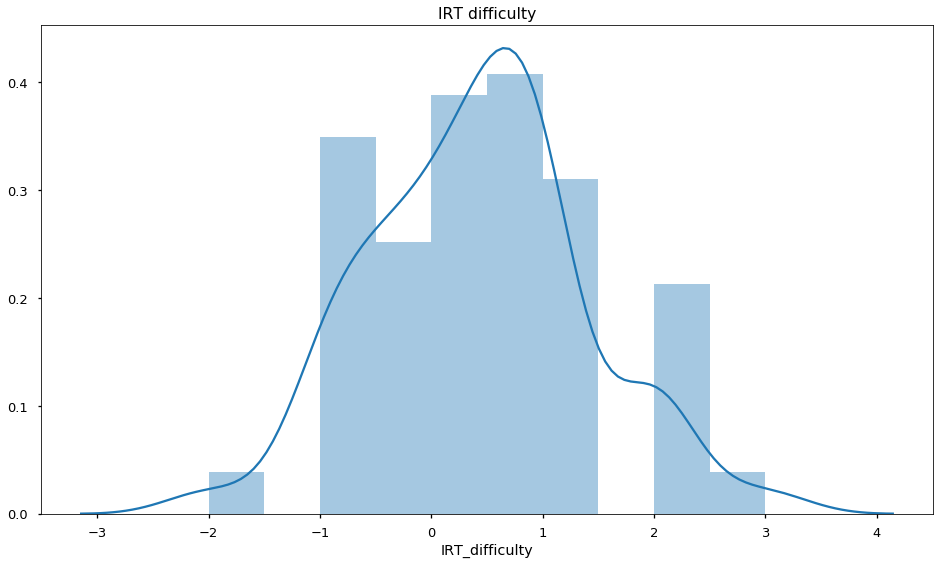

In [12]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("IRT difficulty")
# plt.legend()

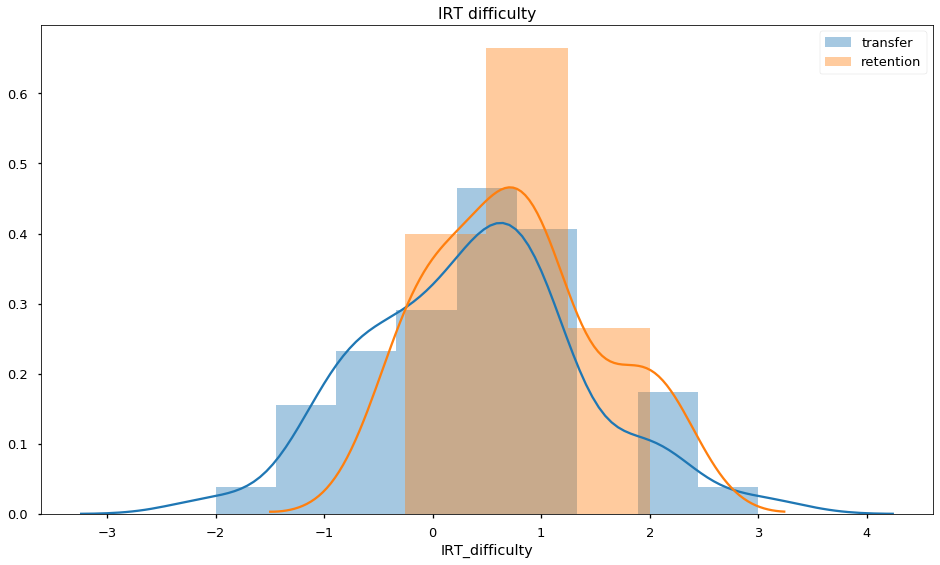

In [13]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.IRT_difficulty[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.IRT_difficulty[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("IRT difficulty")
plt.legend()

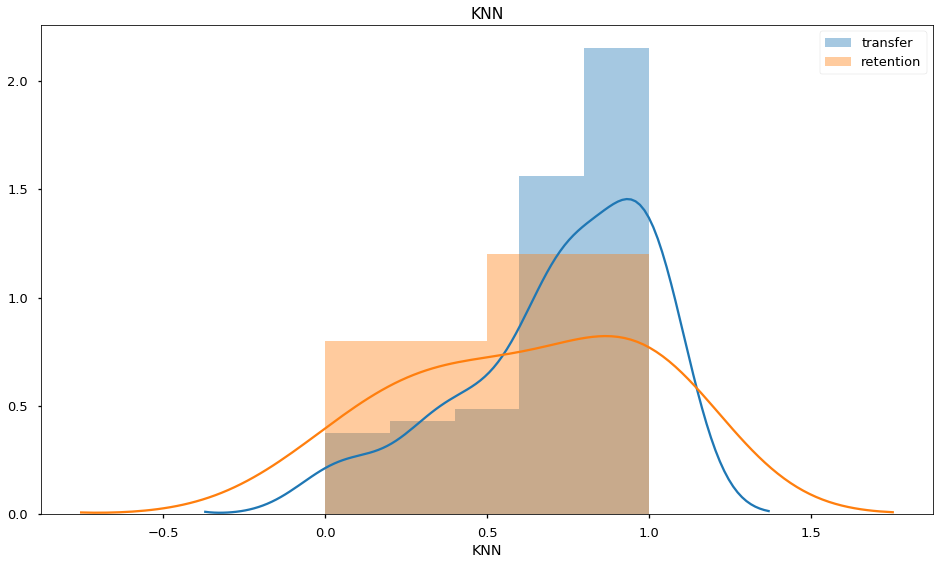

In [14]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.KNN[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.KNN[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("KNN")
plt.legend()

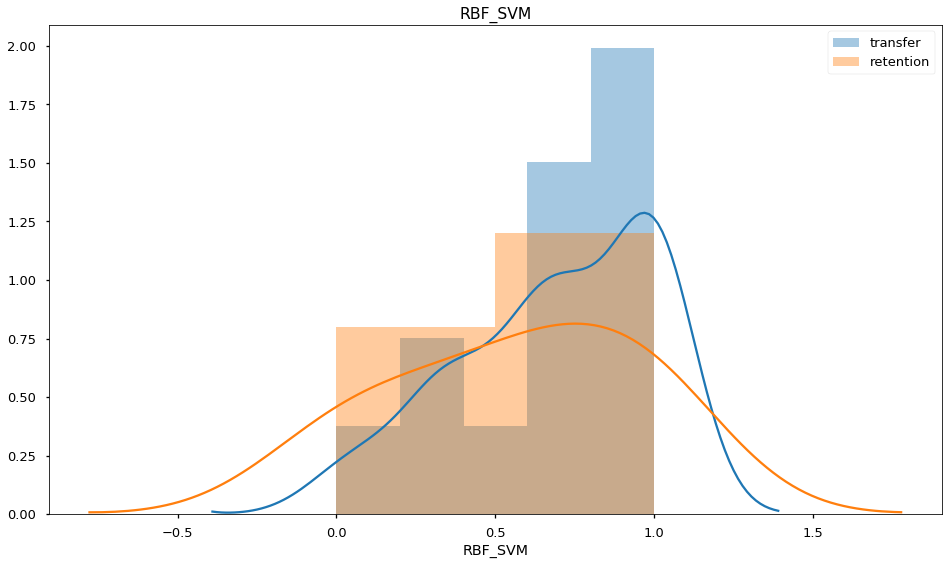

In [15]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.RBF_SVM[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.RBF_SVM[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("RBF_SVM")
plt.legend()

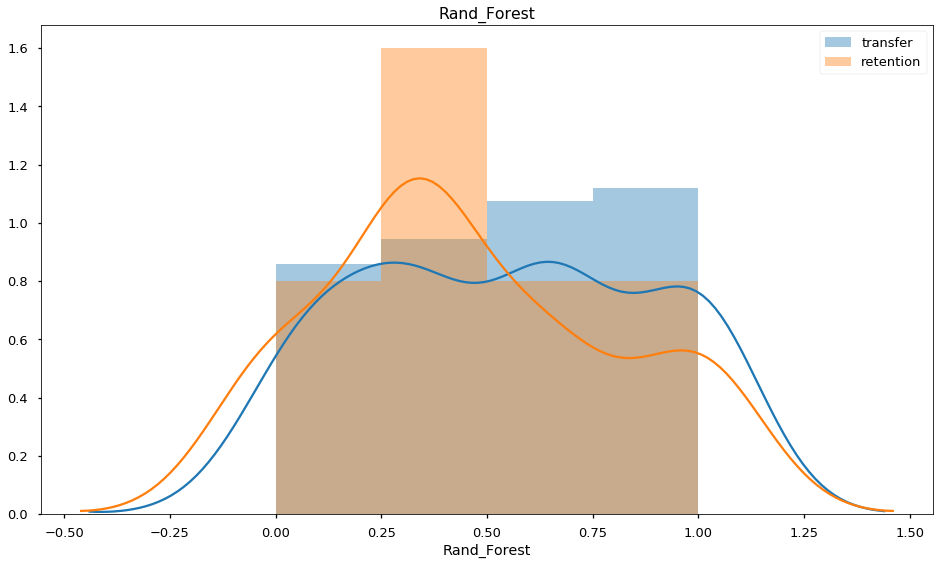

In [16]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.Rand_Forest[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.Rand_Forest[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("Rand_Forest")
plt.legend()

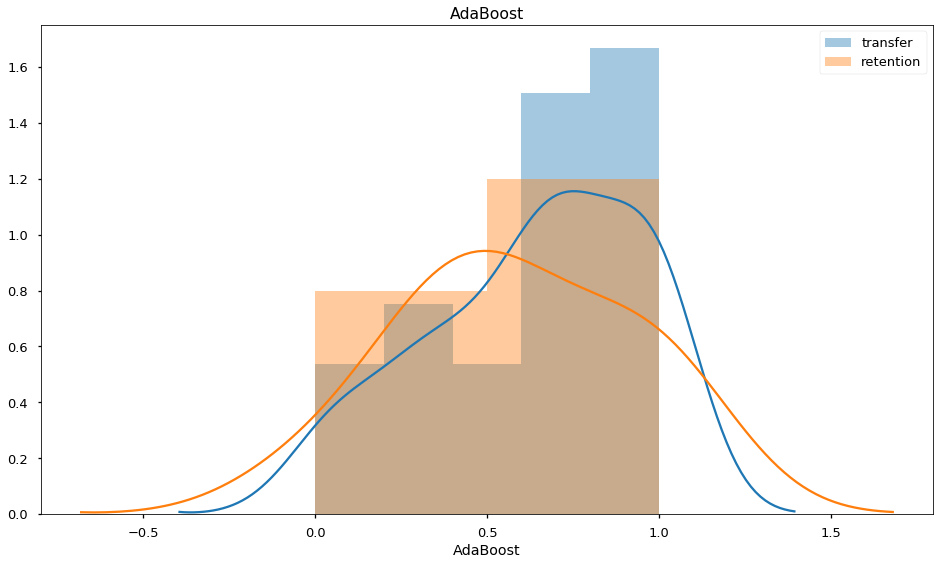

In [17]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.AdaBoost[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.AdaBoost[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("AdaBoost")
plt.legend()

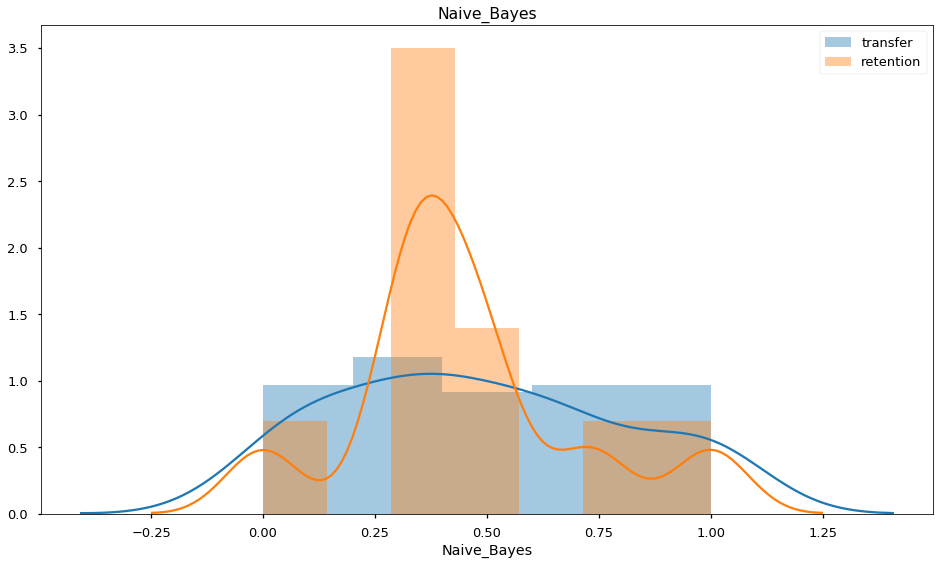

In [18]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.Naive_Bayes[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.Naive_Bayes[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("Naive_Bayes")
plt.legend()

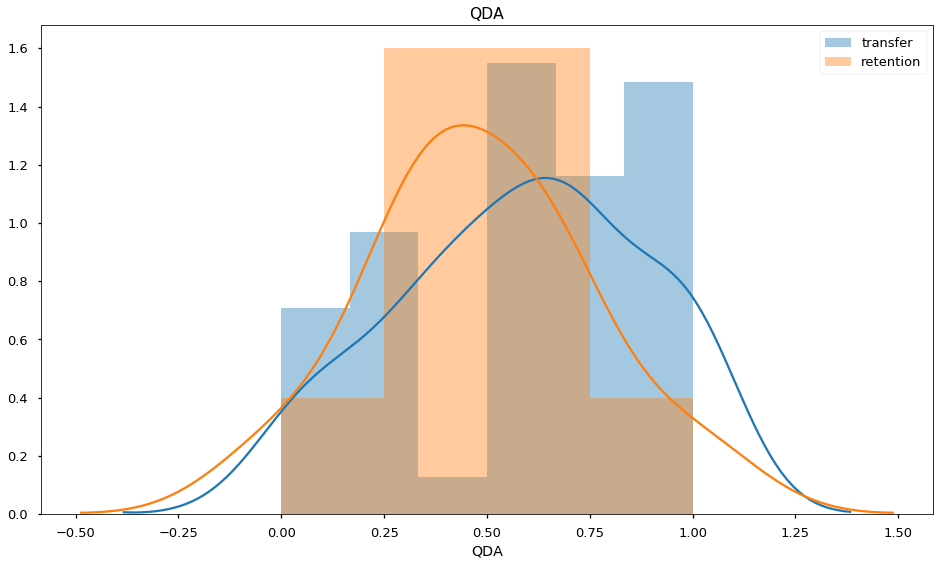

In [19]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.QDA[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.QDA[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("QDA")
plt.legend()


In [20]:
dat_heat=pd.concat([data.loc[(data.process=="transfer")|(data.process=="retention"),["IRT_difficulty","KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA"]],
                      pd.get_dummies(data.loc[(data.process=="transfer")|(data.process=="retention"),["process"]])], axis=1, sort=False)
# dat_heat.index=data.loc[(data.process=="transfer")|(data.process=="retention"),["item_code"]]
dat_heat.sample(15)          

,IRT_difficulty,KNN,RBF_SVM,Rand_Forest,AdaBoost,Naive_Bayes,QDA,process_retention,process_transfer
item_code,,,,,,,,,
EM_35,-0.200671,0.500000,0.766667,0.642857,0.500000,0.500000,1.000000,0,1
VB_15a,-0.302281,0.000000,0.400000,1.000000,0.666667,0.400000,0.400000,0,1
MX_36a,0.154151,0.857143,0.857143,1.000000,0.857143,0.000000,0.666667,0,1
ME_30,0.619039,1.000000,1.000000,1.000000,1.000000,0.000000,0.857143,0,1
SE_3c,0.810930,0.857143,1.000000,1.000000,0.857143,0.000000,1.000000,0,1
LP_16d,0.318454,1.000000,1.000000,1.000000,0.857143,0.857143,0.857143,0,1
LF_26a2,1.000000,0.733333,0.333333,0.333333,0.333333,0.333333,0.333333,0,1
FN_27b,-2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0,1
MX_46b,1.000000,0.642857,0.642857,0.642857,0.642857,0.500000,0.642857,0,1


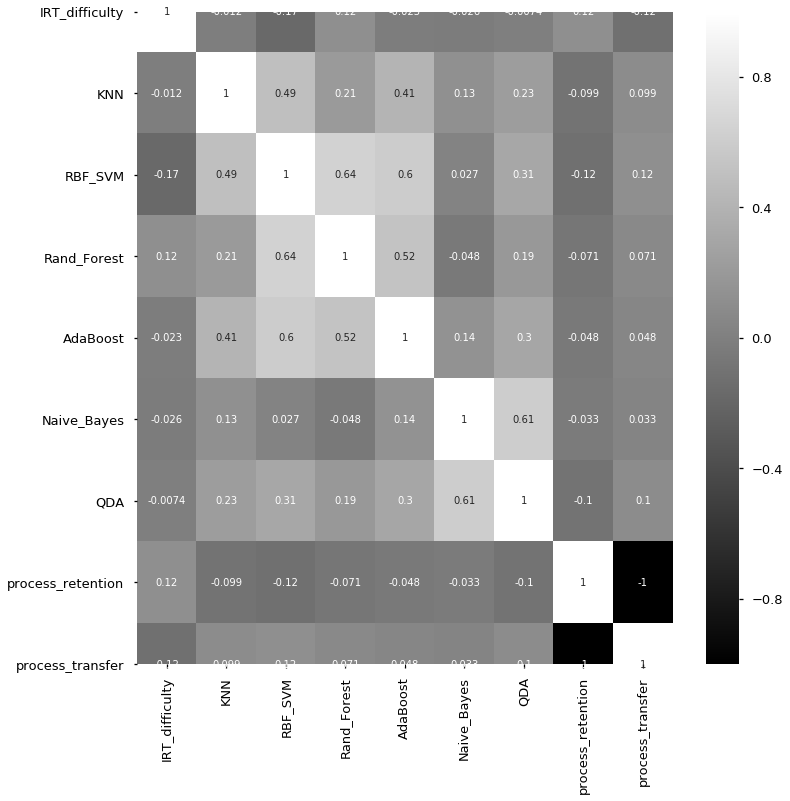

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(dat_heat.corr(), annot=True, vmin=-1, vmax=1,cmap="gray")

In [22]:
# sns.pairplot(dat_heat.iloc[:,:-1], kind="reg")

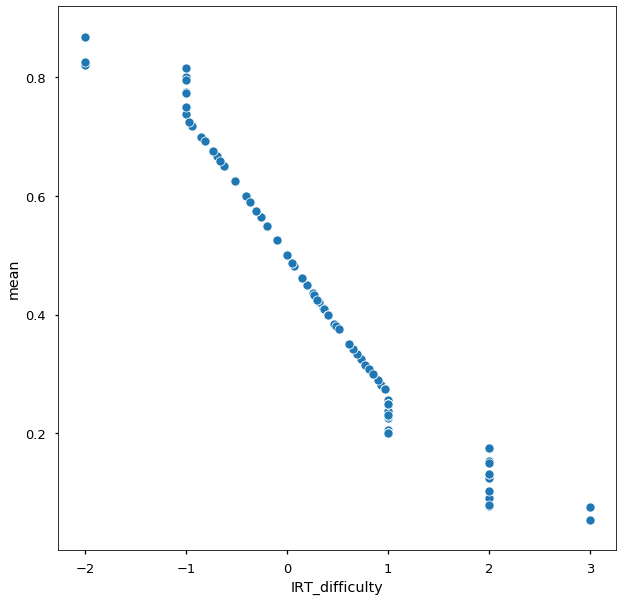

In [23]:
plt.figure(figsize=(10,10))
sns.scatterplot(data.IRT_difficulty,data["mean"])

# Jueces (Descriptivos)

In [24]:
data_jueces=pd.read_csv("votos_jueces.csv", sep=";", decimal=",", index_col=0)
data_jueces.drop(["EM_45c","LF_18a","LF_31b"],inplace=True)
data_jueces[data_jueces[["Recordar","Comprender","Aplicar","Analizar","Evaluar","Crear"]]==0]=np.nan
data_jueces.sample(15)

,Recordar,Comprender,Aplicar,Analizar,Evaluar,Crear,agree_prop_6,proceso_6,n_votes,agree_prop_2,proceso_2,Transfer
item_code,,,,,,,,,,,,
MX_46b,NaN,NaN,NaN,2.0,NaN,NaN,1.00,Analizar,2,1.00,Transferir,2
VB_15a,NaN,NaN,NaN,2.0,1.0,NaN,0.67,Analizar,3,1.00,Transferir,3
ME_73,1.0,NaN,NaN,1.0,NaN,2.0,0.50,undefined,4,0.75,Transferir,3
FN_17a,NaN,2.0,NaN,2.0,NaN,NaN,0.50,undefined,4,1.00,Transferir,4
VB_40a,NaN,1.0,NaN,1.0,1.0,NaN,0.33,undefined,3,1.00,Transferir,3
MS_39,1.0,2.0,NaN,NaN,NaN,NaN,0.67,Comprender,3,0.67,Transferir,2
MS_50a,NaN,1.0,NaN,NaN,NaN,NaN,1.00,Comprender,1,1.00,Transferir,1
EM_21a,NaN,NaN,1.0,NaN,NaN,NaN,1.00,Aplicar,1,1.00,Transferir,1
EM_16b,NaN,1.0,NaN,NaN,1.0,NaN,0.50,undefined,2,1.00,Transferir,2


In [25]:
round(data_jueces.describe(),2)

,Recordar,Comprender,Aplicar,Analizar,Evaluar,Crear,agree_prop_6,n_votes,agree_prop_2,Transfer
count,21.00,83.00,29.00,56.00,32.00,13.00,131.00,131.00,131.00,131.00
mean,1.81,1.40,1.03,1.27,1.09,1.23,0.71,2.34,0.97,2.05
std,0.87,0.56,0.19,0.45,0.30,0.44,0.24,0.87,0.11,0.99
min,1.00,1.00,1.00,1.00,1.00,1.00,0.33,1.00,0.50,0.00
25%,1.00,1.00,1.00,1.00,1.00,1.00,0.50,2.00,1.00,1.00
50%,2.00,1.00,1.00,1.00,1.00,1.00,0.67,2.00,1.00,2.00
75%,2.00,2.00,1.00,2.00,1.00,1.00,1.00,3.00,1.00,3.00
max,4.00,3.00,2.00,2.00,2.00,2.00,1.00,4.00,1.00,4.00


In [26]:
pd.crosstab(index=data_jueces.n_votes, columns="count")

col_0,count
n_votes,
1,26
2,44
3,52
4,9


In [27]:
round((pd.crosstab(index=data_jueces.n_votes, columns="count")/data_jueces.shape[0])*100,2)#.cumsum()

col_0,count
n_votes,
1,19.85
2,33.59
3,39.69
4,6.87


In [28]:
pd.crosstab(index=data_jueces.proceso_6, columns="count")

col_0,count
proceso_6,
Analizar,17
Aplicar,3
Comprender,42
Crear,3
Evaluar,4
Recordar,12
undefined,50


In [29]:
round((pd.crosstab(index=data_jueces.proceso_6, columns="count")/data_jueces.shape[0])*100,2)#.cumsum()

col_0,count
proceso_6,
Analizar,12.98
Aplicar,2.29
Comprender,32.06
Crear,2.29
Evaluar,3.05
Recordar,9.16
undefined,38.17


In [30]:
pd.crosstab(index=data_jueces.proceso_2, columns="count")

col_0,count
proceso_2,
Retener,12
Transferir,115
undefined,4


In [31]:
round((pd.crosstab(index=data_jueces.proceso_2, columns="count")/data_jueces.shape[0])*100,2)#.cumsum()

col_0,count
proceso_2,
Retener,9.16
Transferir,87.79
undefined,3.05


# Final Results
* [matplotlib scatter-hist](https://matplotlib.org/examples/pylab_examples/scatter_hist.html)
* [seaborn jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

In [32]:
data_final=pd.read_csv("final reults.csv", sep=";", decimal=",", index_col=0)
data_final.drop(["EM_45c","LF_18a","LF_31b"],inplace=True)

In [33]:
data_final["IRT_cat"]="Balanceado"
data_final.loc[data_final.IRT_difficulty<=(-1.0),"IRT_cat"]="Fácil"
data_final.loc[data_final.IRT_difficulty>=(1.0) ,"IRT_cat"]="Difícil"
data_final.IRT_cat=pd.Categorical(data_final.IRT_cat, categories=["Fácil","Balanceado","Difícil"], ordered=True)

In [34]:
data_2=data_final.loc[~(data_final.process_2=="undefined"),:]
data_6=data_final.loc[~(data_final.process_6=="undefined"),:]

In [35]:
data_final.process_6=pd.Categorical(data_final.process_6, categories=["undefined","Recordar","Comprender","Aplicar","Analizar","Evaluar","Crear"], ordered=True)
data_final.process_2=pd.Categorical(data_final.process_2, categories=["undefined","Retener","Transferir"], ordered=True)

data_6.process_6=pd.Categorical(data_6.process_6, categories=["Recordar","Comprender","Aplicar","Analizar","Evaluar","Crear"], ordered=True)
data_2.process_2=pd.Categorical(data_2.process_2, categories=["Retener","Transferir"], ordered=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


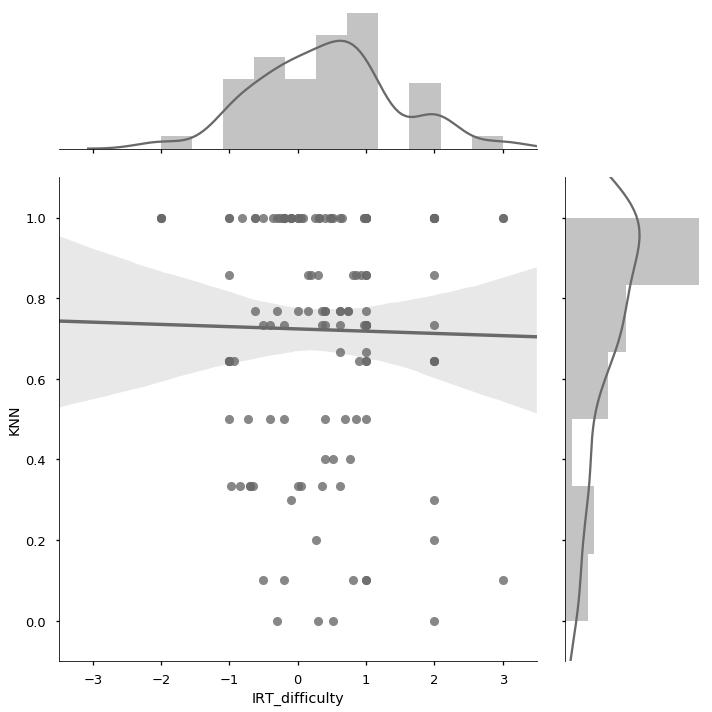

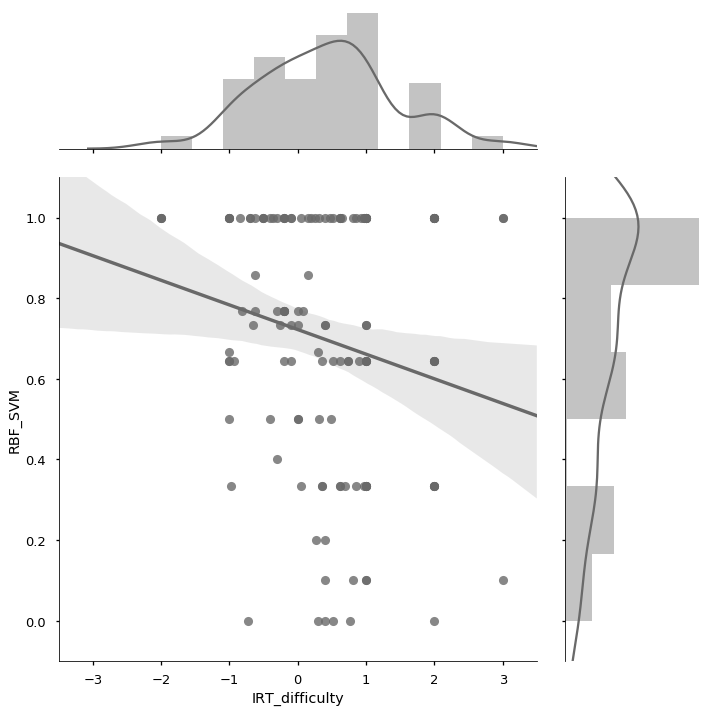

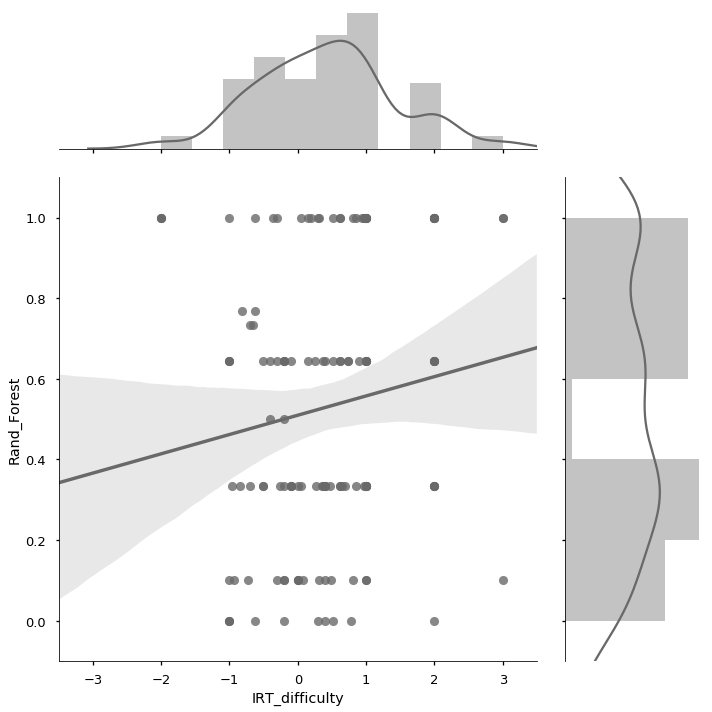

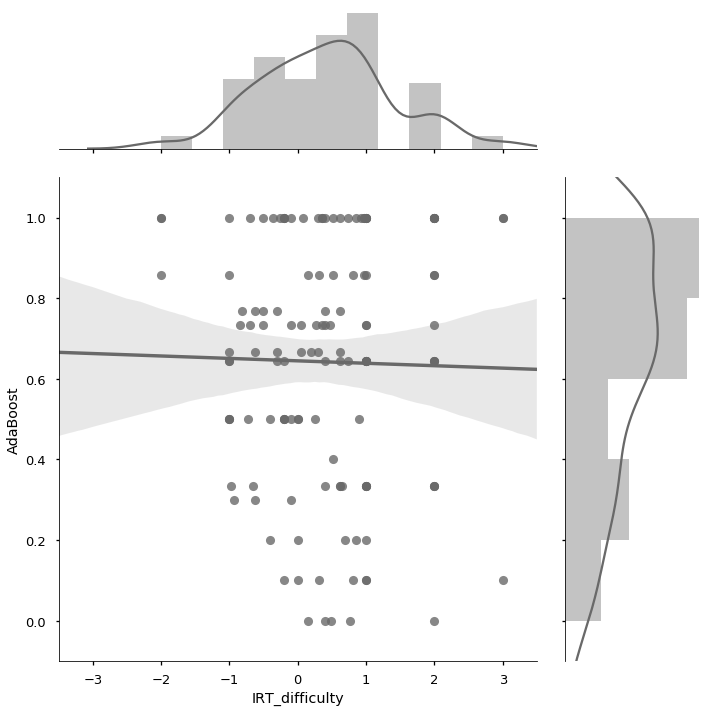

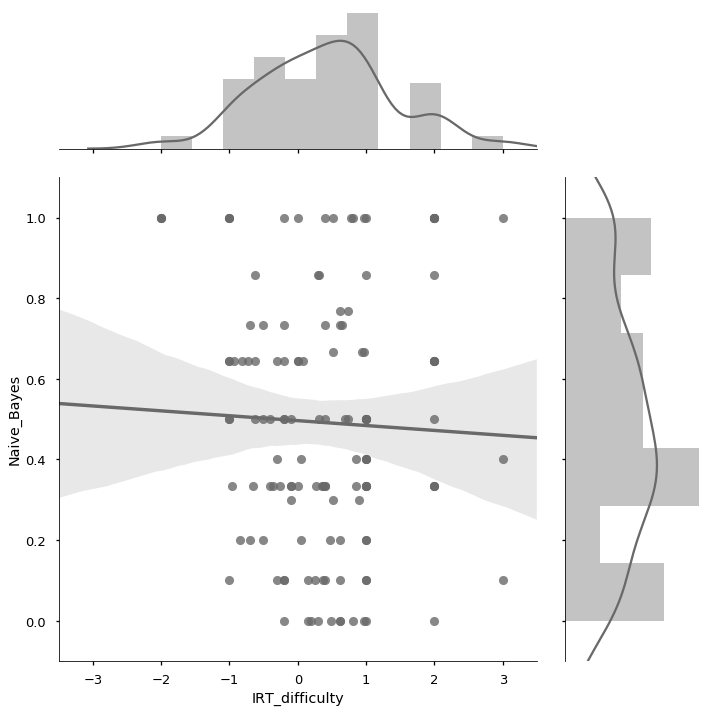

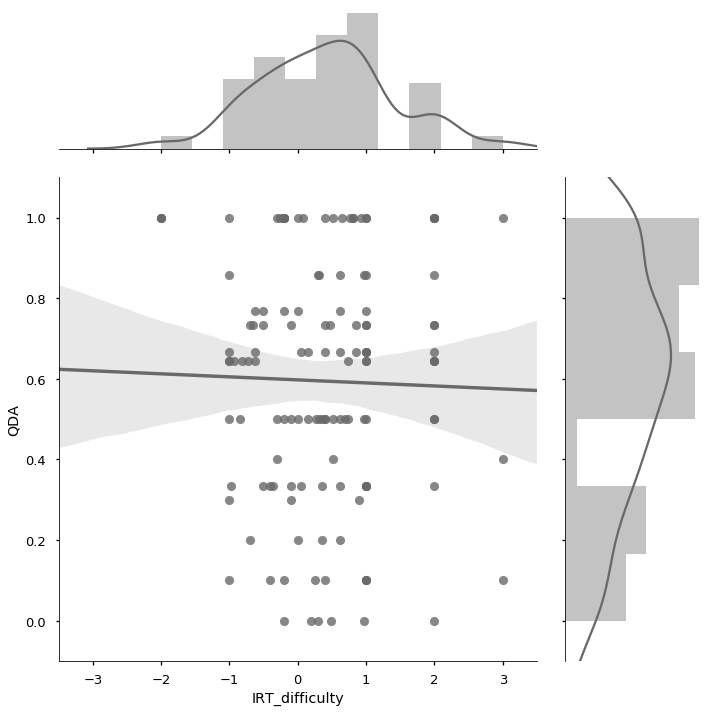

In [36]:
for clasif in ["KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA"]:
    sns.jointplot("IRT_difficulty", clasif, data=data_final,kind="reg", 
                  height=10, ratio=3, color="dimgrey",
                  xlim=(-3.5,3.5), ylim=(-0.1,1.1))

In [37]:
pd.crosstab(data_2.IRT_cat,data_2.process_2, margins=True)

process_2,Retener,Transferir,All
IRT_cat,,,
Fácil,1,10,11
Balanceado,7,75,82
Difícil,4,30,34
All,12,115,127


In [38]:
pd.crosstab(data_6.IRT_cat,data_6.process_6, margins=True)

process_6,Recordar,Comprender,Aplicar,Analizar,Evaluar,Crear,All
IRT_cat,,,,,,,
Fácil,1,4,0,2,2,0,9
Balanceado,7,28,3,9,2,1,50
Difícil,4,10,0,6,0,2,22
All,12,42,3,17,4,3,81


In [39]:
dat_2_freqs=pd.crosstab(index=[data_2.IRT_cat,data_2.process_2], columns="count")
desc_funcs=[np.median,np.std]
#desc_funcs=["count",np.mean,np.median,np.std]
desc_table_2=pd.pivot_table(data_2, 
                            values=["KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA"], 
                            index=["process_2","IRT_cat"],
                            aggfunc={"KNN":desc_funcs,
                                     "RBF_SVM":desc_funcs,
                                     "Rand_Forest":desc_funcs,
                                     "AdaBoost":desc_funcs, 	
                                     "Naive_Bayes":desc_funcs,
                                     "QDA":desc_funcs})


In [40]:
round(desc_table_2,2)

AdaBoost          KNN       Naive_Bayes          QDA  \
                        median   std median   std      median   std median   
process_2  IRT_cat                                                           
Retener    Fácil          0.64   NaN   0.64   NaN        0.64   NaN   0.64   
           Balanceado     0.67  0.27   0.67  0.29        0.33  0.33   0.40   
           Difícil        0.49  0.43   0.43  0.45        0.45  0.24   0.57   
Transferir Fácil          0.76  0.22   0.93  0.20        1.00  0.32   0.76   
           Balanceado     0.67  0.31   0.77  0.31        0.50  0.30   0.64   
           Difícil        0.64  0.30   0.81  0.26        0.45  0.31   0.67   

                            RBF_SVM       Rand_Forest        
                        std  median   std      median   std  
process_2  IRT_cat                                           
Retener    Fácil        NaN    0.64   NaN        1.00   NaN  
           Balanceado  0.26    0.73  0.39        0.33  0.38  
           Difícil     0.31    0.49  0.43        0.49  0.43  
Transferir Fácil       0.32    1.00  0.20        0.64  0.44  
           Balanceado  0.30    0.77  0.31        0.33  0.33  
           Difícil     0.28    0.64  0.31        0.64  0.31

In [41]:
dat_2_freqs=pd.pivot_table(data_2,
                           values=["KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA"], 
                           index=["process_2","IRT_cat"],
                           aggfunc="count")
dat_2_freqs

AdaBoost  KNN  Naive_Bayes  QDA  RBF_SVM  Rand_Forest
process_2  IRT_cat                                                          
Retener    Fácil              1    1            1    1        1            1
           Balanceado         7    7            7    7        7            7
           Difícil            4    4            4    4        4            4
Transferir Fácil             10   10           10   10       10           10
           Balanceado        75   75           75   75       75           75
           Difícil           30   30           30   30       30           30

In [42]:
desc_table_6=pd.pivot_table(data_6, 
                            values=["KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA"], 
                            index=["process_6","IRT_cat"],
                            aggfunc={"AdaBoost":desc_funcs,
                                     "KNN":desc_funcs,
                                     "Naive_Bayes":desc_funcs,
                                     "QDA":desc_funcs, 	
                                     "RBF_SVM":desc_funcs,
                                     "Rand_Forest":desc_funcs,
                                     "AdaBoost":desc_funcs})
round(desc_table_6,2)

AdaBoost          KNN       Naive_Bayes          QDA  \
                        median   std median   std      median   std median   
process_6  IRT_cat                                                           
Recordar   Fácil          0.64   NaN   0.64   NaN        0.64   NaN   0.64   
           Balanceado     0.67  0.27   0.67  0.29        0.33  0.33   0.40   
           Difícil        0.49  0.43   0.43  0.45        0.45  0.24   0.57   
Comprender Fácil          1.00  0.25   1.00  0.18        1.00  0.18   0.83   
           Balanceado     0.70  0.35   0.77  0.30        0.42  0.28   0.73   
           Difícil        0.75  0.34   0.86  0.22        0.40  0.32   0.67   
Aplicar    Balanceado     0.73  0.18   1.00  0.58        0.50  0.17   0.73   
Analizar   Fácil          0.58  0.12   0.75  0.35        0.55  0.64   0.55   
           Balanceado     0.73  0.30   0.50  0.37        0.73  0.33   0.50   
           Difícil        0.64  0.23   0.88  0.18        0.57  0.36   0.69   
Evaluar    Fácil          0.86  0.00   0.93  0.10        1.00  0.00   0.93   
           Balanceado     0.69  0.06   0.48  0.40        0.42  0.12   0.50   
Crear      Balanceado     0.20   NaN   0.50   NaN        0.33   NaN   0.73   
           Difícil        0.82  0.25   0.82  0.25        0.52  0.17   0.52   

                            RBF_SVM       Rand_Forest        
                        std  median   std      median   std  
process_6  IRT_cat                                           
Recordar   Fácil        NaN    0.64   NaN        1.00   NaN  
           Balanceado  0.26    0.73  0.39        0.33  0.38  
           Difícil     0.31    0.49  0.43        0.49  0.43  
Comprender Fácil       0.20    1.00  0.00        0.82  0.47  
           Balanceado  0.35    0.77  0.28        0.50  0.34  
           Difícil     0.24    0.87  0.31        0.64  0.31  
Aplicar    Balanceado  0.25    1.00  0.15        0.33  0.39  
Analizar   Fácil       0.64    0.75  0.35        0.05  0.07  
           Balanceado  0.31    0.40  0.39        0.33  0.33  
           Difícil     0.33    0.64  0.25        0.64  0.25  
Evaluar    Fácil       0.10    0.83  0.24        0.50  0.71  
           Balanceado  0.00    0.42  0.31        0.49  0.22  
Crear      Balanceado   NaN    0.33   NaN        0.33   NaN  
           Difícil     0.17    0.82  0.25        0.82  0.25

In [43]:
dat_6_freqs=pd.pivot_table(data_6,
                           values=["KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA"], 
                           index=["process_6","IRT_cat"],
                           aggfunc="count")
dat_6_freqs

AdaBoost   KNN  Naive_Bayes   QDA  RBF_SVM  Rand_Forest
process_6  IRT_cat                                                            
Recordar   Fácil            1.0   1.0          1.0   1.0      1.0          1.0
           Balanceado       7.0   7.0          7.0   7.0      7.0          7.0
           Difícil          4.0   4.0          4.0   4.0      4.0          4.0
Comprender Fácil            4.0   4.0          4.0   4.0      4.0          4.0
           Balanceado      28.0  28.0         28.0  28.0     28.0         28.0
           Difícil         10.0  10.0         10.0  10.0     10.0         10.0
Aplicar    Balanceado       3.0   3.0          3.0   3.0      3.0          3.0
Analizar   Fácil            2.0   2.0          2.0   2.0      2.0          2.0
           Balanceado       9.0   9.0          9.0   9.0      9.0          9.0
           Difícil          6.0   6.0          6.0   6.0      6.0          6.0
Evaluar    Fácil            2.0   2.0          2.0   2.0      2.0          2.0
           Balanceado       2.0   2.0          2.0   2.0      2.0          2.0
Crear      Balanceado       1.0   1.0          1.0   1.0      1.0          1.0
           Difícil          2.0   2.0          2.0   2.0      2.0          2.0